In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


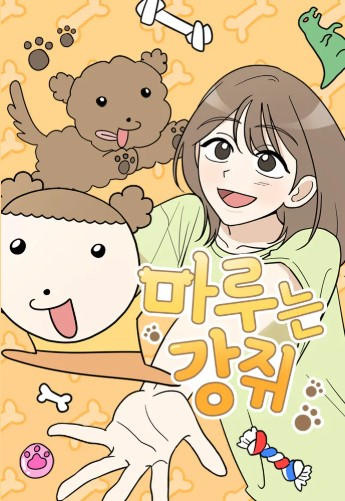

In [29]:
Img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/Project/maruispuppy.jpg')
cv2_imshow(Img1)

(501, 345, 3)


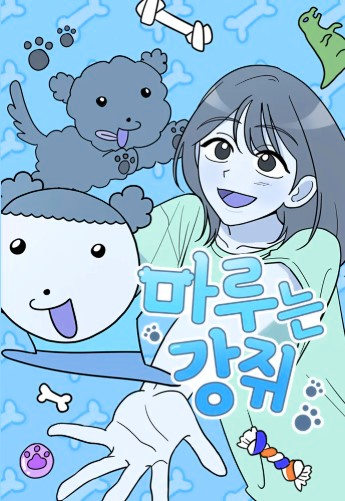

In [30]:
RGB_Img = cv2.cvtColor(Img1, cv2.COLOR_BGR2RGB)

print(RGB_Img.shape)
cv2_imshow(RGB_Img)

(501, 345)


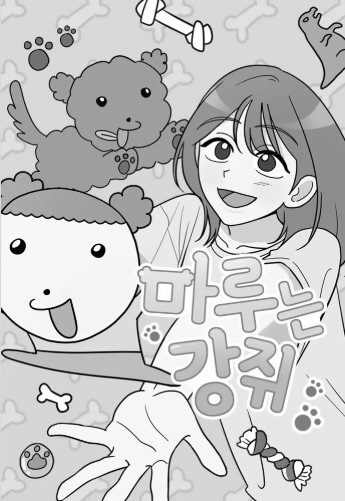

In [31]:
gImg = cv2.cvtColor(RGB_Img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
cv2_imshow(gImg)

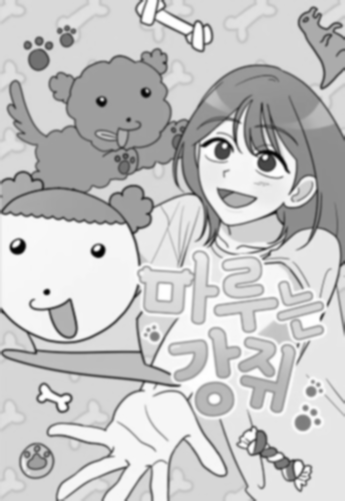

In [32]:
Gaussian_Blurred = cv2.GaussianBlur(gImg, (5, 5), 0)
cv2_imshow(Gaussian_Blurred)

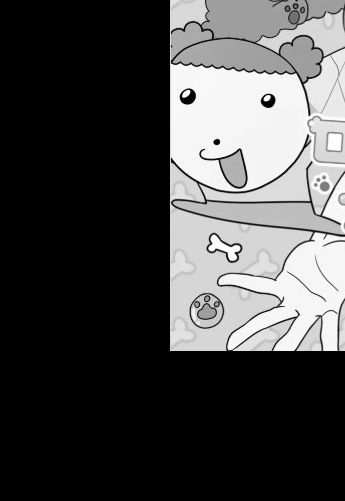

In [47]:
height, width = gImg.shape[:2]
M = np.float32([[1,0,170], [0,1,-150]])
outImg = cv2.warpAffine(gImg, M, (width, height))
cv2_imshow(outImg)

[[  0.70710678  -0.70710678 227.15432893]
 [  0.70710678   0.70710678 -48.39906166]]
(2, 3)


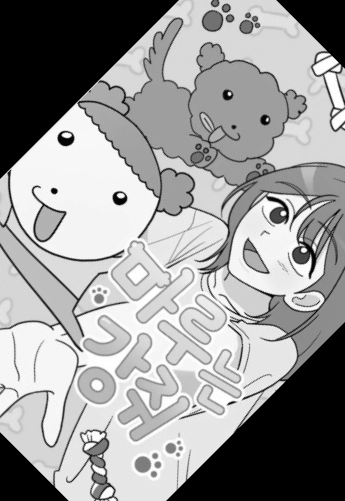

In [48]:
M = cv2.getRotationMatrix2D(((width-1)/2.0, (height-1)/2.0), -45, 1)
print(M)
print(M.shape)
outImg = cv2.warpAffine(gImg, M, (width, height))
cv2_imshow(outImg)

[[-1.0000000e+00 -1.2246468e-16  3.4400000e+02]
 [ 1.2246468e-16 -1.0000000e+00  5.0000000e+02]]
(2, 3)


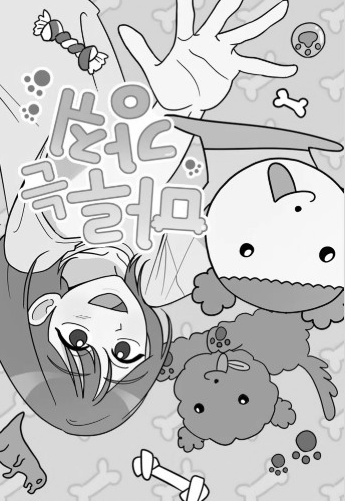

In [49]:
M = cv2.getRotationMatrix2D(((width-1)/2.0, (height-1)/2.0), -180, 1)
print(M)
print(M.shape)
outImg = cv2.warpAffine(gImg, M, (width, height))
cv2_imshow(outImg)

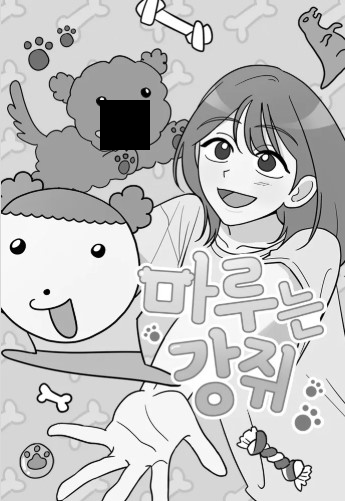

In [50]:
Img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/Project/maruispuppy.jpg', cv2.IMREAD_GRAYSCALE)

for h in range(100, 150):  # 세로 방향 좌표 범위
    for w in range(100, 150):  # 가로 방향 좌표 범위
        Img2[h, w] = 0  # 픽셀 값을 0(검은색)으로 설정

cv2_imshow(Img2)

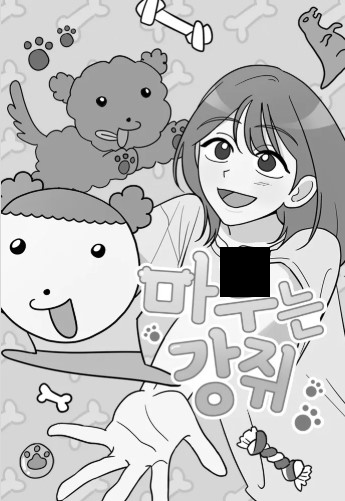

In [80]:
Img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/Project/maruispuppy.jpg', cv2.IMREAD_GRAYSCALE)

# 이동 거리 설정
vertical_shift = 147  # 아래로 50 픽셀 이동
horizontal_shift = 120  # 오른쪽으로 50 픽셀 이동

# 새로운 박스 좌표 계산
start_y, end_y = 100 + vertical_shift, 150 + vertical_shift  # 세로 방향 좌표
start_x, end_x = 100 + horizontal_shift, 150 + horizontal_shift  # 가로 방향 좌표

# 특정 영역을 검정색(0)으로 설정
for h in range(start_y, end_y):
    for w in range(start_x, end_x):
        Img2[h, w] = 0

# 결과 출력
cv2_imshow(Img2)

(624, 706)


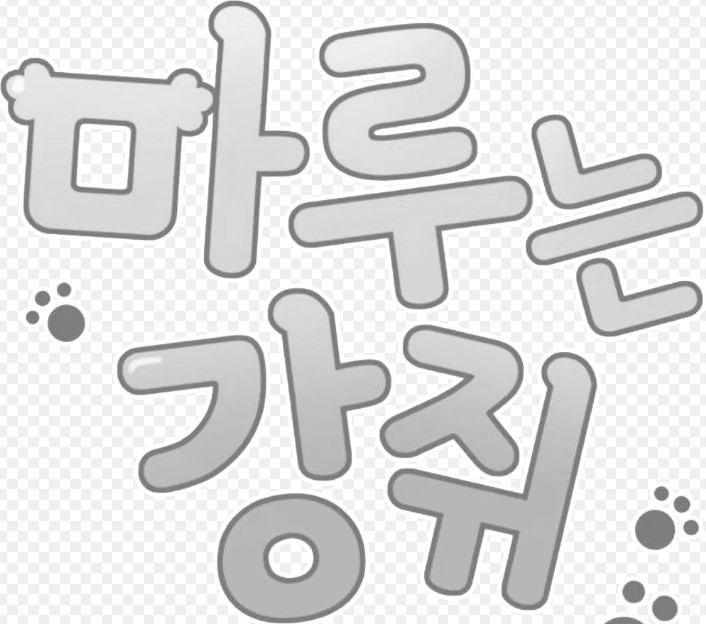

In [33]:
Img3 = cv2.imread('/content/gdrive/My Drive/ColabIP/Project/Title.jpg')
RGB_Img3 = cv2.cvtColor(Img3, cv2.COLOR_BGR2RGB)

gImg3 = cv2.cvtColor(RGB_Img3, cv2.COLOR_RGB2GRAY)
print(gImg3.shape)
cv2_imshow(gImg3)

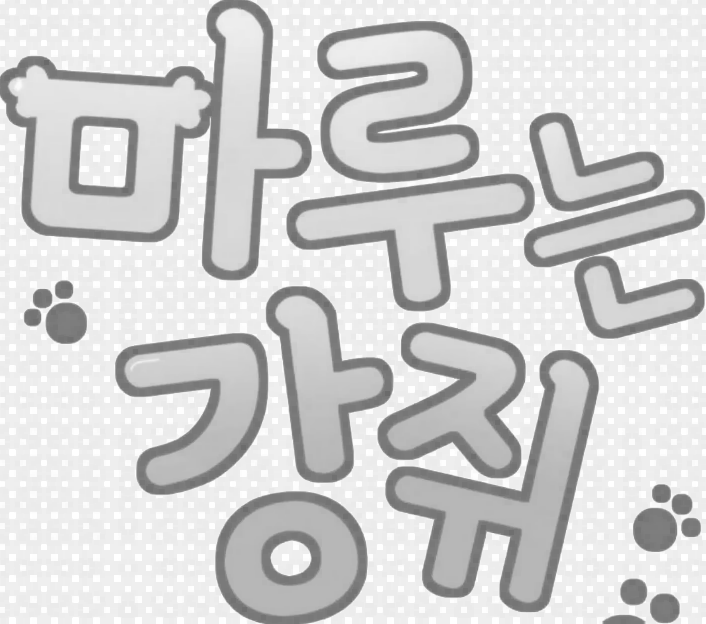

In [34]:
kernel = np.ones((3,3), np.uint8)
erodeImg = cv2.erode(gImg3, kernel, iterations = 2)
cv2_imshow(erodeImg)

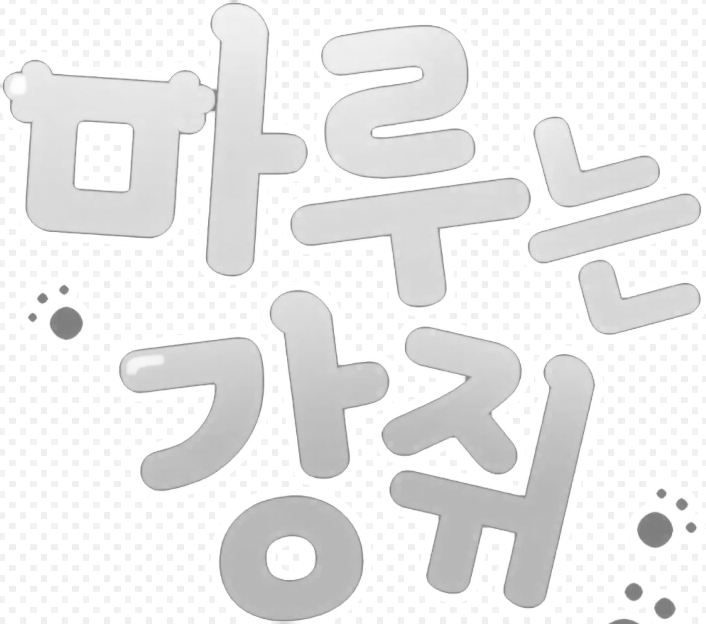

In [35]:
kernel = np.ones((3,3), np.uint8)
dilateImg = cv2.dilate(gImg3, kernel, iterations = 2)
cv2_imshow(dilateImg)